# Computer Vision Masterclass - Autoencoders for image compression

## Linear autoencoder

In [1]:
# 작고 단순한 이미지를 다루는 데는 선형 오토인코더로 충분.

### Importing the libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.17.1'

### Loading the dataset

- Dataset: https://keras.io/api/datasets/mnist/

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
X_train.shape, y_train.shape
# 60000개의 이미지, 각 이미지 크기는 28x28. RGB 부분이 없으므로 흑백 이미지.
# 이 데이터셋으로 이미지를 압축하기 위한 오토인코더를 구현

((60000, 28, 28), (60000,))

In [6]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [7]:
X_train[0],

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

In [8]:
y_train[0],  # 0번째 이미지는 숫자 5를 나타냄을 의미

(5,)

### Visualizing the images

In [9]:
np.random.randint(0, 59999)

21441

2


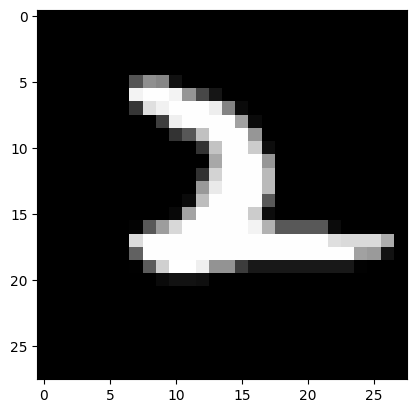

In [10]:
i = np.random.randint(0, 59999)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray');

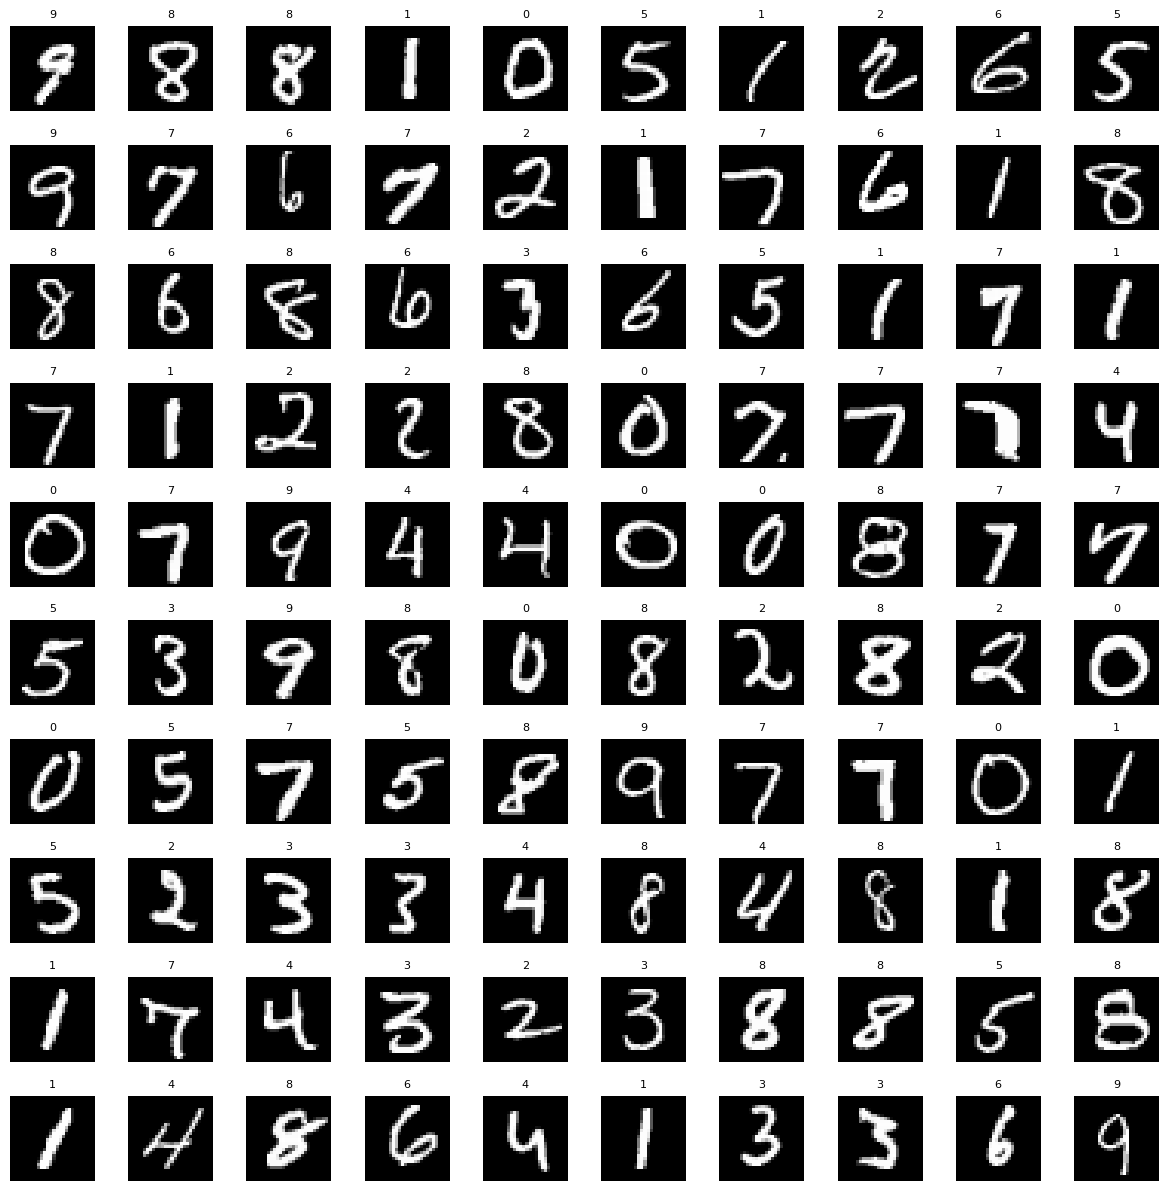

In [11]:
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize=(15,15))
#print(axes.shape)
axes = axes.ravel() # 이미지로 출력하려면 행렬을 벡터로 변환해야 함.  (10,10) -> [100]
#print(axes.shape)
for i in np.arange(0, width*height):
    index = np.random.randint(0, 59999)
    axes[i].imshow(X_train[index], cmap='gray')
    axes[i].set_title(y_train[index], fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [12]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [13]:
# 신경망 학습 시 작은 스케일이 필요.
# 큰 값의 경우 학습 시간이 길게 소요됨. + 결과도 좋지 않음.
X_train = X_train / 255
X_test = X_test / 255

In [14]:
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

In [15]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
# 선형 오토인코더에서는 행렬을 벡터로 변환해서 그 벡터를 신경망의 입력층으로 사용해야 함.
X_train.shape[0], X_train.shape[1], X_train.shape[2]

(60000, 28, 28)

In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train.shape

(60000, 784)

In [18]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_test.shape

(10000, 784)

### Building and training the linear autoencoder

In [19]:
# 784 - 128 - 64 - 32(인코딩된 층. 압축된 이미지가 저장됨) - 64 - 128 - 784   <- 픽셀 크기
# 784 - 128 - 64 - 32  <- 인코딩 층
# - 64 - 128 - 784   <- 디코딩 층
# 입력층과 출력층이 동일한 수의 픽셀이 있도록 하는 것이 중요

In [20]:
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units=128, activation='relu', input_shape=(784,)))
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=32, activation='relu'))

#Decode
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=128, activation='relu'))
autoencoder.add(Dense(units=784, activation='sigmoid')) # 입력층의 픽셀 범위는 0~1. 시그모이드 함수는 0~1사이의 값을 반환


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

### Encoding the images

In [22]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
# 시그모이드 활성화 함수를 사용하므로 loss='binary_crossentropy'를 사용.

In [23]:
autoencoder.fit(X_train, X_train, epochs=50)
# ex. 고양이 이미지를 입력층으로 보내면 출력층에서도 같은 고양이 이미지를 갖게 되기 때문.
# 이때, 원본 이미지와 디코딩된 이미지를 비교할 필요가 있음.
# 단순 분류 문제와 다름. 우리는 지금 오토인코더를 하고 있음.
# 큰 정확도 기대X. 분류 문제가 아니므로 정확도를 고려할 필요 없음. 검증 자체가 다르기 때문.
# 지금은 원본이미지와 디코딩된 이미지를 비교하는 작업임.

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0116 - loss: 0.2047
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.0112 - loss: 0.1136
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0129 - loss: 0.1033
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0128 - loss: 0.0978
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0135 - loss: 0.0950
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0137 - loss: 0.0927
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0135 - loss: 0.0915
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0141 - loss: 0.0899
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0134 - loss: 0.0891
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0142 - loss: 0.0883
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0145 - loss: 0.0877
Epoch 12/50
1875/1875 ━━━━━━━━

In [24]:
autoencoder.inputs

[<KerasTensor shape=(None, 784), dtype=float32, sparse=False, name=keras_tensor>]

In [25]:
autoencoder.get_layer('dense_2').output

<KerasTensor shape=(None, 32), dtype=float32, sparse=False, name=keras_tensor_6>

In [27]:
# 검증 이미지 인코딩
# 인코딩된 이미지만 보려면 (784 - 128 - 64 - 32) 이 부분만 있으면 됨.
encoder = Model(inputs=autoencoder.inputs, outputs=autoencoder.get_layer('dense_2').output) # 신경망 생성

In [28]:
encoder.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

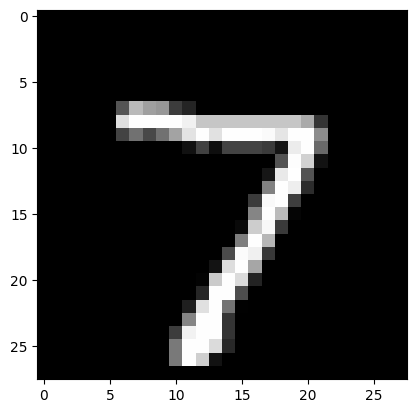

In [29]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray');

In [30]:
X_test[0].shape

(784,)

In [32]:
X_test[0].reshape(1, -1).shape

(1, 784)

In [33]:
encoded_image = encoder.predict(X_test[0].reshape(1, -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


In [35]:
encoded_image, encoded_image.shape  # 총 32픽셀

(array([[1.5104626, 3.975829 , 0.       , 2.8949065, 2.8013787, 3.1163132,
         2.795145 , 3.8027163, 0.       , 1.4369735, 9.553794 , 0.       ,
         5.232435 , 0.9159544, 4.6744   , 0.       , 2.1331687, 0.       ,
         1.7897834, 3.2981594, 4.431417 , 7.4174294, 5.4005013, 0.       ,
         3.5793185, 3.200026 , 1.4048284, 5.1721425, 4.4428897, 0.       ,
         1.3131722, 2.7212832]], dtype=float32),
 (1, 32))

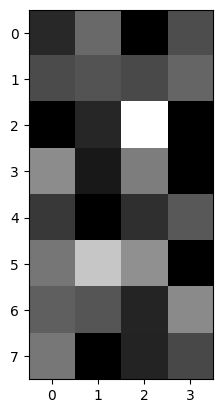

In [37]:
plt.imshow(encoded_image.reshape(8,4), cmap='gray');  # 인코딩된 이미지

### Decoding the images

In [41]:
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 667,154 (2.54 MB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444,770 (1.70 MB)

In [40]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs=input_layer_decoder, outputs=decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
decoded_image = decoder.predict(encoded_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


In [44]:
decoded_image.shape

(1, 784)

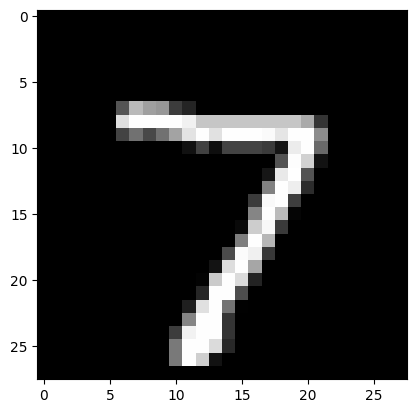

In [46]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray');

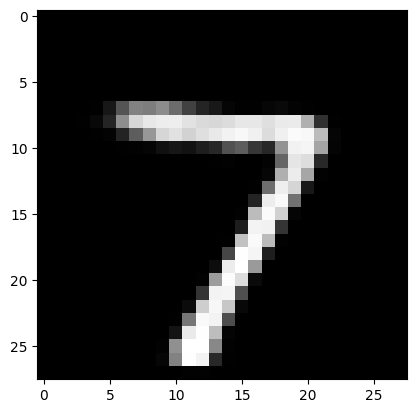

In [47]:
plt.imshow(decoded_image.reshape(28,28), cmap='gray');

### Encoding and decoding the test images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


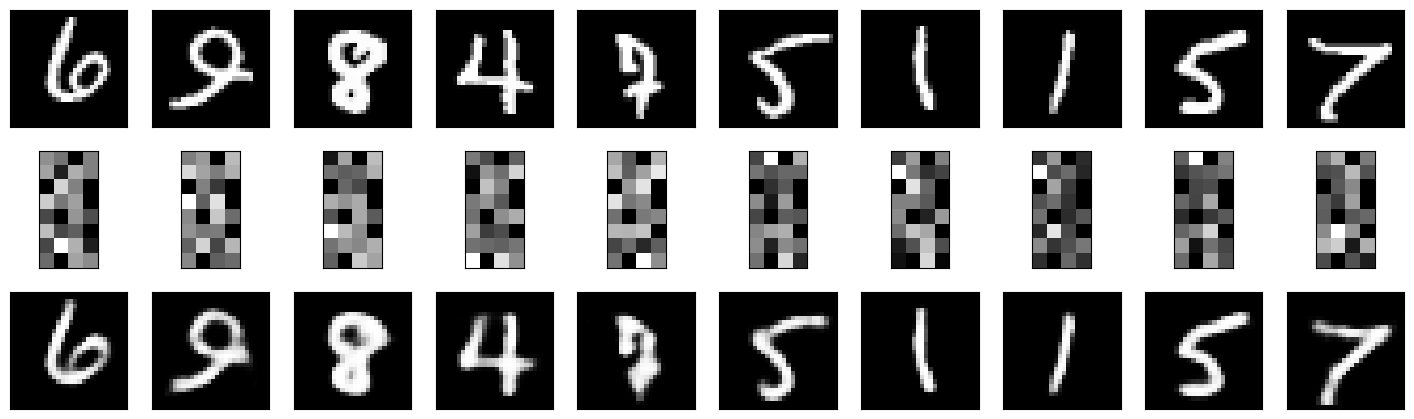

In [61]:
n_images = 10  # 검증 데이터셋에서 선택할 이미지 수
test_images = np.random.randint(0, X_test.shape[0]-1, size=n_images)
#print(test_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
    #print(i, image_index)
    # Original images
    ax = plt.subplot(10, 10, i+1)
    plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
    plt.xticks(())
    plt.yticks(())

    # Coded images
    ax = plt.subplot(10, 10, i + 1 + n_images)
    encoded_image = encoder.predict(X_test[image_index].reshape(1, -1))
    plt.imshow(encoded_image.reshape(8,4), cmap='gray')
    plt.xticks(())
    plt.yticks(())

    # Decoded images
    ax = plt.subplot(10, 10, i + 1 + n_images*2)
    plt.imshow(decoder.predict(encoded_image).reshape(28,28), cmap='gray')
    plt.xticks(())
    plt.yticks(())

## Convolutional autoencoders

### Importing the libraries

In [63]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten
# UpSampling2D -> 맥스풀링 적용 시 이미지 크기가 감소함. 하지만 오토인코더를 사용하려면 이미지를 재생성 해야함.
# 업 샘플링층을 사용해 크기를 증가시킬 것임. 즉, 맥스 풀링과 정반대
# Reshape -> 벡터를 행렬로 변환. Flatten과 정반대
# 이 두개의 클래스를 추가한 이유는 입력값이 출력값과 정확히 일치해야 하기 때문.

### Loading the dataset

- Dataset: https://keras.io/api/datasets/fashion_mnist/

In [64]:
from tensorflow.keras.datasets import fashion_mnist

In [65]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [66]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [67]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

### Visualizing the images

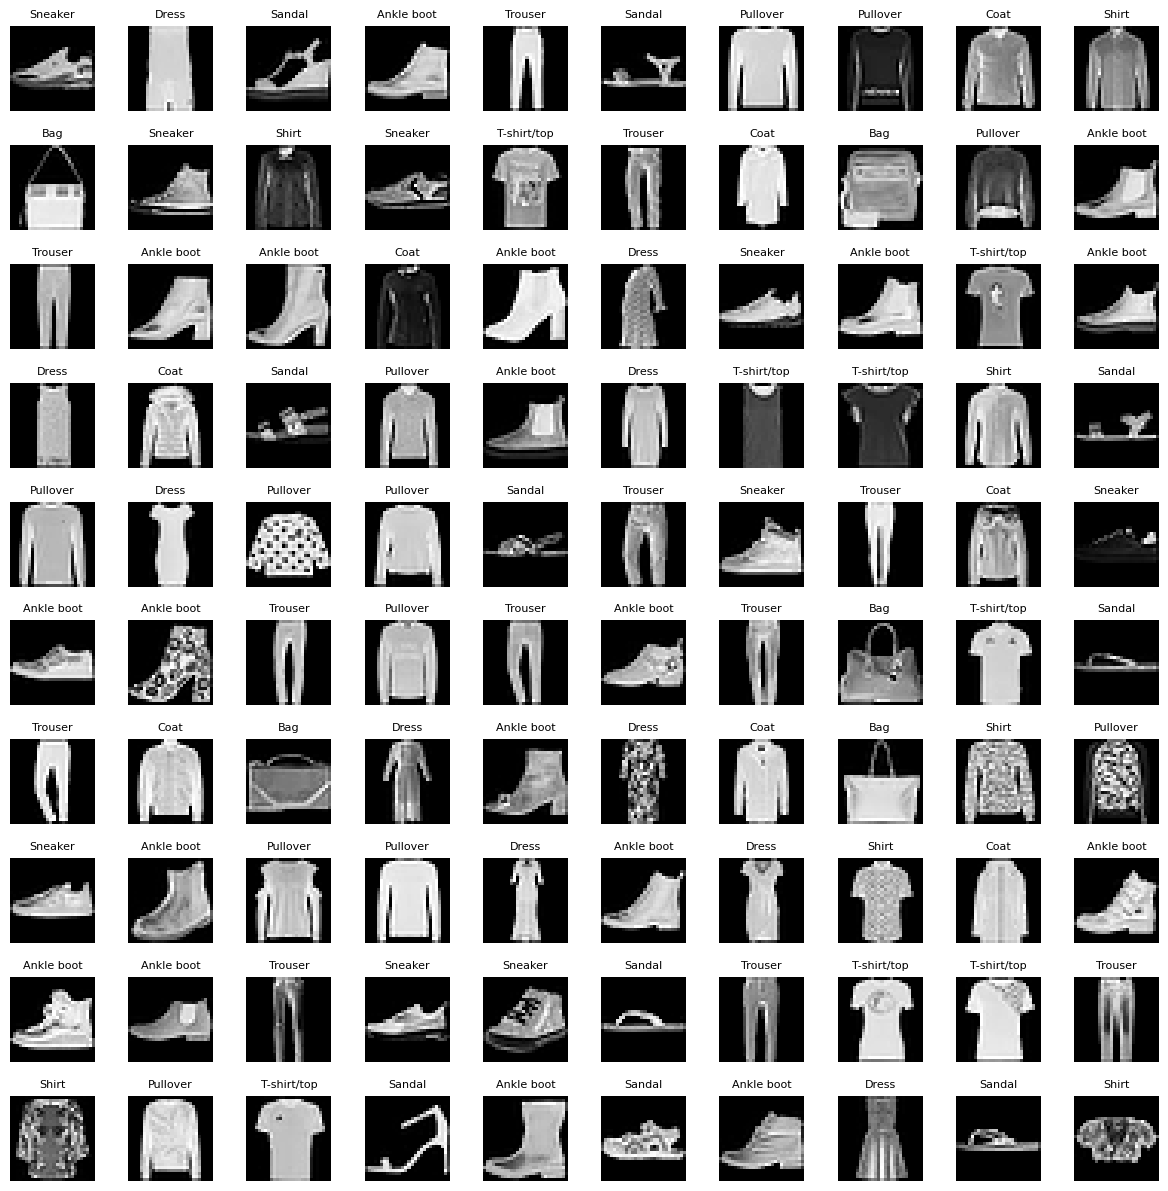

In [68]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize=(15,15))
axes = axes.ravel()
for i in np.arange(0, width*height):
    index = np.random.randint(0, 60000)
    axes[i].imshow(X_train[index], cmap='gray')
    axes[i].set_title(classes[y_train[index]], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [69]:
X_train = X_train / 255
X_test = X_test / 255

In [70]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [71]:
X_train = X_train.reshape((len(X_train), 28, 28, 1))  # 1은 흑백 이미지임을 의미
X_test = X_test.reshape((len(X_test), 28, 28, 1))

In [72]:
X_train.shape, X_test.shape  # 합성곱 신경망의 입력층에는 이미지를 평탄화하지 않아도 됨.

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Building and training the convolutional autoencoder

In [87]:
autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')) # 필터 개수를 줄이면서 이미지의 크기를 줄여나감.
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#autoencoder.summary()  # Output Shape에서 마지막 숫자는 필터 개수를 의미.

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same', strides=(2,2)))

autoencoder.add(Flatten())

#autoencoder.summary()


# Decoder
autoencoder.add(Reshape((4,4,8)))
#autoencoder.summary()
autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
#autoencoder.summary()
autoencoder.add(UpSampling2D(size=(2,2))) # 이미지 크기를 늘리는 클래스. size=(2,2) -> 인코딩에서 맥스풀링과 동일한 크기 사용.
#autoencoder.summary() # (7,7,8)이 되면 좋겠지만 값을 반올림한 결과이므로 괜찮음.

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))  # (28, 28, 16) 이어야 하므로 padding='same'은 지웠음.
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same')) # sigmoid -> 정규화를 했으므로 0과 1 사이의 값이 필요.

autoencoder.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_53 (Conv2D)                   │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_8 (Reshape)                  │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_16 (UpSampling2D)      │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_17 (UpSampling2D)      │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_18 (UpSampling2D)      │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# padding='valid' 일때의 공식. same일때는 달라지지 않음.
# Output = (Input - Filter + 1) / Stride

# Input: (28, 28, 1)
# Filter size: 3
# Output: (28 - 3 + 1) / 1 = 26

# UpSampling2D: (16, 16, 8)
# Filter size: 3
# Output (16 - 3 + 1) / 1 = 14 -> (14, 14, 16)

In [88]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [90]:
autoencoder.fit(X_train, X_train, epochs=50)
# 손실과 정확도 값은 오토인코더 평가에는 적합하지 않음.
# 직접 이미지를 보고 확인하는 것이 평가에 더 나은 방법임.

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.4996 - loss: 0.3583
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5042 - loss: 0.2929
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5060 - loss: 0.2864
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5074 - loss: 0.2830
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5061 - loss: 0.2822
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5057 - loss: 0.2812
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5077 - loss: 0.2789
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5071 - loss: 0.2787
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5090 - loss: 0.2769
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5076 - loss: 0.2771
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5074 - loss: 0.2766
Epoch 12/50
1875/1875 ━━━━━━

### Encoding and decoding the test images

In [91]:
autoencoder.summary()  # 이 중 평탄화층이 인코딩된 이미지와 동일함.

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_53 (Conv2D)                   │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_8 (Reshape)                  │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_16 (UpSampling2D)      │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_17 (UpSampling2D)      │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_18 (UpSampling2D)      │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,157 (51.40 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,772 (34.27 KB)

In [92]:
encoder = Model(inputs=autoencoder.inputs, outputs=autoencoder.get_layer('flatten_10').output)
encoder.summary()

Model: "functional_133"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 128)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,904 (7.44 KB)

 Trainable params: 1,904 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
coded_test_images = encoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [94]:
coded_test_images.shape  # 인코딩된 각 이미지는 128 픽셀 크기

(10000, 128)

In [95]:
coded_test_images[0] # 128개의 픽셀

array([0.6247457 , 0.3810812 , 0.95447016, 0.88764846, 0.00832767,
       0.42313355, 0.54231787, 0.25786522, 0.99571943, 0.        ,
       1.0310549 , 0.9609221 , 0.13233642, 0.41656545, 0.27098492,
       0.11145324, 1.1264706 , 0.        , 1.1208568 , 0.97300434,
       0.26775765, 0.62290436, 0.29791355, 0.11405517, 1.0730737 ,
       0.        , 0.9225737 , 1.197896  , 0.19671337, 0.9147121 ,
       0.31426817, 0.3080195 , 1.0279216 , 0.17945296, 1.1347669 ,
       1.076906  , 0.1067475 , 0.57131046, 0.7343853 , 0.3446979 ,
       1.3108042 , 0.        , 0.97772217, 1.2206397 , 0.4996036 ,
       0.84681463, 0.78395224, 1.1114061 , 0.70416886, 0.        ,
       0.44714338, 1.129031  , 2.2578561 , 1.1712053 , 2.6379802 ,
       2.0162997 , 1.2077758 , 0.        , 1.0015911 , 1.7331383 ,
       2.1134448 , 1.1848468 , 2.8092177 , 0.75728965, 0.41770616,
       0.09727848, 0.30717582, 1.124421  , 1.3662113 , 0.64820176,
       1.677484  , 1.83419   , 0.80074155, 0.        , 0.74038

In [96]:
decoded_test_images = autoencoder.predict(X_test)
decoded_test_images.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


(10000, 28, 28, 1)

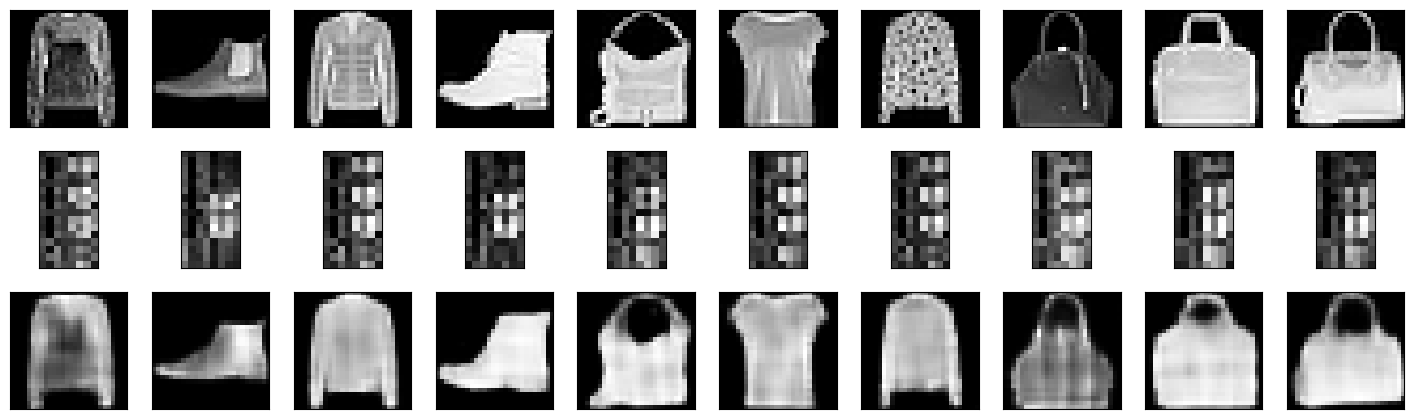

In [98]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0], size=n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
    # Original images
    ax = plt.subplot(10, 10, i+1)
    plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
    plt.xticks(())
    plt.yticks(())

    # Coded images
    ax = plt.subplot(10, 10, i + 1 + n_images)
    plt.imshow(coded_test_images[image_index].reshape(16,8), cmap='gray')
    plt.xticks(())
    plt.yticks(())

    # Decoded images
    ax = plt.subplot(10, 10, i + 1 + n_images*2)
    plt.imshow(decoded_test_images[image_index].reshape(28,28), cmap='gray')
    plt.xticks(())
    plt.yticks(())